## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Data Generation for ANCOVA

In [3]:
np.random.seed(42)

n = 15  # number of students per group
methods = ['Lecture', 'Video', 'Workshop']
data = []

for method in methods:
    for _ in range(n):
        gpa = np.round(np.random.normal(3.0, 0.3), 2)  # GPA between ~2.4 to ~3.6
        base_score = {'Lecture': 70, 'Video': 75, 'Workshop': 85}[method]
        score = base_score + 5 * (gpa - 3.0) + np.random.normal(0, 3)
        data.append((method, gpa, score))

df = pd.DataFrame(data, columns=['Method', 'GPA', 'Score'])

df.sample(5)

,Method,GPA,Score
42,Workshop,2.76,82.294729
41,Workshop,3.44,85.645189
22,Video,2.56,70.640467
34,Workshop,3.11,83.614641
36,Workshop,2.99,89.643931


### ANCOVA Model 

- Score ~ C(Method) + GPA

In [4]:
model = ols('Score ~ C(Method) + GPA', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANCOVA Table")
anova_table

ANCOVA Table


,sum_sq,df,F,PR(>F)
C(Method),2005.304218,2.0,105.728668,6.564704e-17
GPA,80.497115,1.0,8.488341,5.763690e-03
Residual,388.813527,41.0,NaN,NaN


In [5]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     74.01
Date:                Thu, 15 May 2025   Prob (F-statistic):           1.36e-16
Time:                        12:03:14   Log-Likelihood:                -112.37
No. Observations:                  45   AIC:                             232.7
Df Residuals:                      41   BIC:                             240.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                53.86

In [6]:
# Predict scores at mean GPA
df['GPA_centered'] = df['GPA'] - df['GPA'].mean()  # center GPA to interpret adjusted means
model_centered = ols('Score ~ C(Method) + GPA_centered', data=df).fit()
print(model_centered.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     74.01
Date:                Thu, 15 May 2025   Prob (F-statistic):           1.36e-16
Time:                        12:03:18   Log-Likelihood:                -112.37
No. Observations:                  45   AIC:                             232.7
Df Residuals:                      41   BIC:                             240.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                69.19

In [10]:
# Get predicted means for each method at average GPA
means_df = df.copy()
means_df['GPA_centered'] = 0  # force all to mean GPA
means_df['predicted'] = model_centered.predict(means_df)

adjusted_means = means_df.groupby('Method')['predicted'].mean().reset_index()
adjusted_means

,Method,predicted
0,Lecture,69.193110
1,Video,74.412424
2,Workshop,85.226838


/tmp/ipykernel_28268/2810910700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=adjusted_means, x='Method', y='predicted', palette='Set2')


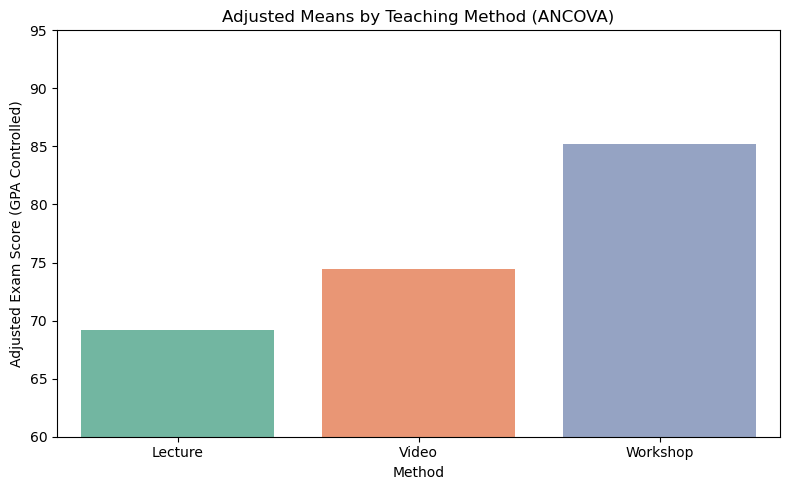

In [9]:
# Plot adjusted means
plt.figure(figsize=(8, 5))
sns.barplot(data=adjusted_means, x='Method', y='predicted', palette='Set2')
plt.ylabel('Adjusted Exam Score (GPA Controlled)')
plt.title('Adjusted Means by Teaching Method (ANCOVA)')
plt.ylim(60, 95)
plt.tight_layout()
plt.show()


**Please feel free to ask any questions**

**&copy;** *Aayush Raj Regmi, 2025*
